In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

In [2]:
cifar10 = tf.keras.datasets.cifar10  # Carrega o conjunto de dados 

(x_train, y_train), (x_test, y_test) = cifar10.load_data()  

x_train, x_test = x_train / 255.0, x_test / 255.0  # Normaliza as imagens dividindo por 255, para que os valores de pixels fiquem entre 0 e 1
y_train, y_test = y_train.flatten(), y_test.flatten()  # Achata os arrays de rótulos (eles têm formato (N, 1)) para (N,)

print("x_train.shape: ", x_train.shape)  
print("y_train.shape: ", y_train.shape)  


x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [3]:
K = len(set(y_train))
print("numero de classes: ", K)

numero de classes:  10


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    BatchNormalization,
    Activation,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
)

# Entrada com shape das imagens (28, 28, 1) ou (32, 32, 3) dependendo do dataset
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), padding="same")(i)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(32, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(128, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D((2, 2))(x)

# Camadas densas
x = Flatten()(x)
x = Dropout(0.3)(x)  # Dropout ajustado para maior regularização
x = Dense(512, activation="relu")(x)  # Reduzi o número de neurônios
x = Dropout(0.4)(x)  # Aumentei o dropout
x = Dense(K, activation="softmax")(x)

# Criar o modelo
model = Model(i, x)

# Exibir o resumo do modelo
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,305,834 (4.98 MB)

 Trainable params: 1,305,066 (4.98 MB)

 Non-trainable params: 768 (3.00 KB)

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 63ms/step - accuracy: 0.3826 - loss: 1.7944 - val_accuracy: 0.4846 - val_loss: 1.5605
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.6203 - loss: 1.0764 - val_accuracy: 0.7071 - val_loss: 0.8485
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.6942 - loss: 0.8698 - val_accuracy: 0.7029 - val_loss: 0.8798
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 66ms/step - accuracy: 0.7374 - loss: 0.7624 - val_accuracy: 0.7229 - val_loss: 0.8047
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.7693 - loss: 0.6740 - val_accuracy: 0.6394 - val_loss: 1.1602
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 68ms/step - accuracy: 0.7923 - loss: 0.5972 - val_accuracy: 0.7779 - val_loss: 0.6614
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.8189 - loss: 0.5277 - val_accuracy: 0.7882 - val_loss: 0.6230
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0

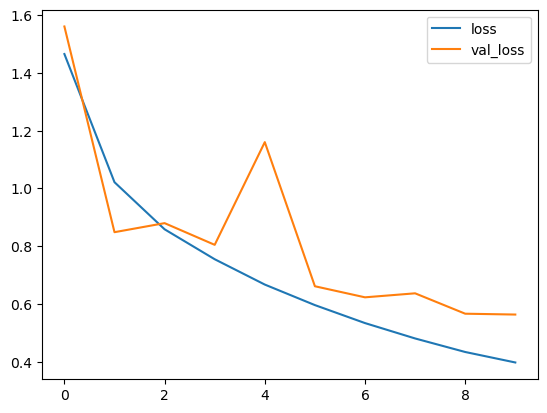

In [6]:
plt.plot(r.history["loss"], label="loss")  # Plota a curva de perda de treinamento usando os valores armazenados em r.history["loss"]
plt.plot(r.history["val_loss"], label="val_loss")  # Plota a curva de perda de validação usando os valores armazenados em r.history["val_loss"]
plt.legend()  

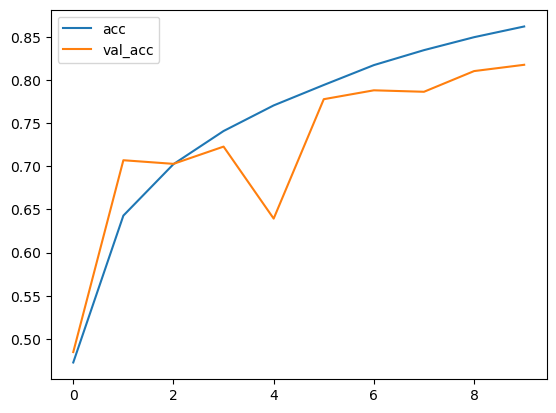

In [7]:
plt.plot(r.history["accuracy"], label="acc")  # Plota a curva de acurácia de treinamento usando os valores armazenados em r.history["accuracy"]
plt.plot(r.history["val_accuracy"], label="val_acc")  # Plota a curva de acurácia de validação usando os valores armazenados em r.history["val_accuracy"]
plt.legend()  